# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import openweathermapy.core as owm
from requests.exceptions import HTTPError


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
city_weather_data = "../CSV/city_weather.data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
#test np.random for lat and long
lat1 = np.random.uniform(low = 0.000, high = 90, size = 10 )
print(lat1)
long1 = np.random.uniform(low = 0.000, high = 180.000, size = 10)
print(long1)

[61.45627945 61.60432307 78.85834364 64.28084386 53.44375278 54.92691065
  7.83933948 48.42616568 83.24716805 31.37868829]
[ 72.10735708  15.15744257  93.27437208  15.3374888   69.19256721
 175.87735259 103.63784375  94.76050005  62.99730309 167.73580201]


In [25]:
#testing the zip of the two variables, convert to a list to print
#lat_long1 = []
lat_long1 = list(zip(lat1, long1))
lat_long1

[(61.45627945315989, 72.10735707948045),
 (61.60432307362616, 15.157442567144148),
 (78.85834363663386, 93.27437208263727),
 (64.28084385980492, 15.337488799720894),
 (53.44375277899626, 69.1925672085898),
 (54.926910645925766, 175.8773525877933),
 (7.83933948390958, 103.63784374620383),
 (48.426165681320846, 94.76050005242739),
 (83.2471680459311, 62.99730308701474),
 (31.378688286907487, 167.73580201184785)]

In [26]:
#not part of homework
#test code to learn more about citipy, could not find more reference material for other calls you can make beside nearest city, name
cities1 = []
for x in lat_long1:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities1:
        cities1.append(city)
        


In [27]:
#print(cities1)

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [29]:
print(cities)

['port lincoln', 'port alfred', 'codrington', 'souillac', 'hirado', 'avarua', 'mehamn', 'geraldton', 'fairbanks', 'torbay', 'saskylakh', 'mogadishu', 'punta arenas', 'cidreira', 'mar del plata', 'bluff', 'jamestown', 'atuona', 'marcona', 'andenes', 'grindavik', 'albany', 'nijar', 'new norfolk', 'bredasdorp', 'nettetal', 'tiksi', 'maceio', 'alibag', 'gairo', 'vao', 'buinsk', 'ushuaia', 'chagda', 'barrow', 'basco', 'ambilobe', 'hermanus', 'rundu', 'xuddur', 'nago', 'yellowknife', 'mataura', 'coihaique', 'saldanha', 'busselton', 'illoqqortoormiut', 'koungou', 'kingaroy', 'cape town', 'uwayl', 'hilo', 'vaini', 'tidore', 'meulaboh', 'sawakin', 'taolanaro', 'carlisle', 'faanui', 'east london', 'half moon bay', 'sechura', 'bundaberg', 'sitka', 'kavieng', 'khatanga', 'azimur', 'butaritari', 'necochea', 'quatre cocos', 'grand gaube', 'troitskoye', 'cayenne', 'salalah', 'sovetskiy', 'fortuna', 'upernavik', 'dalkola', 'chokurdakh', 'dikson', 'qaanaaq', 'longyearbyen', 'kaitangata', 'belushya guba

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Create a settings object with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [31]:
#method #1 without using the openweathermapy wrapper
#create empty lists to be used in data frame

#weather_data1=[]
#temperature = []
#humidity = []
#cloudiness = []
#windspeed = []
#lat = []
#long = []
#city_name = []

#create a record1 counter
#create variables for the units of measurement(fahrenheit = imperial)
#create variable for units
#create url, it is less clean than the openweather wrapper

#record1 = 0
#units = "imperial"

#url = 'http://api.openweathermap.org/data/2.5/weather?q='

#run a loop for all the cities in our list. 
#append the new data to our empty lists listed above
#for city in cities:
#    city_weather = requests.get(url+city+"&appid="+api_key+"&units="+units).json()
    
#    if city_weather["cod"] == 200:
#        weather_data1.append(city_weather)
#        temperature.append(city_weather["main"]["temp"])
#        humidity.append(city_weather["main"]["humidity"])
#        cloudiness.append(city_weather["clouds"]["all"])
#        windspeed.append(city_weather["wind"]["speed"])
#        lat.append(city_weather["coord"]["lat"])
#        long.append(city_weather["coord"]["lon"])
#        city_name.append(city)
#        record1 += 1
#        print(f'Processing Record {record1} of Set 1 | {city}')
#    else:
#        print(f'City was not found! Skipping.')
#print out once the for loop is complete        
#print("Data download complete.")

In [32]:
#test out the list of weather data that was appended
#weather_data1

In [33]:
#usint the openweathermapy.core wrapper
#create empty weather_data list to hold info for each city, don't think really need this
#create record counter
#create a summary list to use in wrapper to pull only the information we need

weather_data = []
record = 0
summary = ["name","sys.country","dt","main.temp_max","main.humidity","clouds.all","wind.speed","coord.lat","coord.lon"]

#create for loop with a try and except to help deal with the HTTP:Not Found error, and continue once it gets it

for city in cities:
    try:
        city_weather = owm.get_current(city, **settings)
        data = city_weather(*summary)
        weather_data.append(data)
        record += 1 
        print(f'Processing Record {record} of Set 1 | {city}')
    except Exception as e:
        print(f'The city of {city} was not found! Skipping. Error code was {e}')
        continue
print(f'The OpenWeather API data dump is complete.')        

Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | hirado
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | mehamn
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | mogadishu
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | atuona
The city of marcona was not found! Skipping. Error code was HTTP Error 404: Not Found
The city of andenes was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 19 of Set 1 | grindavik
Processing Record 20 of Set 1 | albany
Processi

Processing Record 149 of Set 1 | ulaangom
The city of ruatoria was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 150 of Set 1 | saint-joseph
Processing Record 151 of Set 1 | port hawkesbury
Processing Record 152 of Set 1 | xai-xai
Processing Record 153 of Set 1 | alta floresta
Processing Record 154 of Set 1 | bathsheba
Processing Record 155 of Set 1 | castro
Processing Record 156 of Set 1 | garbolovo
Processing Record 157 of Set 1 | sabang
Processing Record 158 of Set 1 | oranjestad
Processing Record 159 of Set 1 | garhi khairo
The city of samusu was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 160 of Set 1 | sur
The city of korla was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 161 of Set 1 | constitucion
Processing Record 162 of Set 1 | camacupa
Processing Record 163 of Set 1 | inhambane
Processing Record 164 of Set 1 | hasaki
Processing Record 165 of Set 1 | severodvinsk
Processin

Processing Record 294 of Set 1 | xichang
Processing Record 295 of Set 1 | adelaide
Processing Record 296 of Set 1 | shirokiy
Processing Record 297 of Set 1 | agropoli
Processing Record 298 of Set 1 | nalut
Processing Record 299 of Set 1 | saint-leu
Processing Record 300 of Set 1 | gold coast
Processing Record 301 of Set 1 | hualmay
Processing Record 302 of Set 1 | dingle
Processing Record 303 of Set 1 | novopokrovka
Processing Record 304 of Set 1 | tabou
Processing Record 305 of Set 1 | vardo
Processing Record 306 of Set 1 | magadan
Processing Record 307 of Set 1 | san quintin
Processing Record 308 of Set 1 | san julian
Processing Record 309 of Set 1 | lubyany
Processing Record 310 of Set 1 | mizdah
Processing Record 311 of Set 1 | townsville
Processing Record 312 of Set 1 | san patricio
Processing Record 313 of Set 1 | itarema
Processing Record 314 of Set 1 | gombong
Processing Record 315 of Set 1 | baykit
Processing Record 316 of Set 1 | krasnystaw
Processing Record 317 of Set 1 | nu

Processing Record 457 of Set 1 | oranzherei
Processing Record 458 of Set 1 | verkhoyansk
Processing Record 459 of Set 1 | vuktyl
Processing Record 460 of Set 1 | diphu
Processing Record 461 of Set 1 | te anau
Processing Record 462 of Set 1 | florianopolis
Processing Record 463 of Set 1 | kandrian
Processing Record 464 of Set 1 | santa maria
Processing Record 465 of Set 1 | avera
The city of krasnoselkup was not found! Skipping. Error code was HTTP Error 404: Not Found
The city of tabiauea was not found! Skipping. Error code was HTTP Error 404: Not Found
Processing Record 466 of Set 1 | donskoye
Processing Record 467 of Set 1 | ulundi
Processing Record 468 of Set 1 | tombouctou
Processing Record 469 of Set 1 | dutse
Processing Record 470 of Set 1 | matelica
Processing Record 471 of Set 1 | kelso
Processing Record 472 of Set 1 | formosa do rio preto
Processing Record 473 of Set 1 | alofi
Processing Record 474 of Set 1 | abalak
The city of tawzar was not found! Skipping. Error code was HT

In [34]:
#test out data dump
#print(weather_data)

In [35]:
column_names = ["City","Country","Date","Max Temperature(F)","Humidity","Cloudiness","Wind Speed(mph)","Latitude","Longitude"]
weather_df = pd.DataFrame(weather_data,columns=column_names)
weather_df.dtypes

City                   object
Country                object
Date                    int64
Max Temperature(F)    float64
Humidity                int64
Cloudiness              int64
Wind Speed(mph)       float64
Latitude              float64
Longitude             float64
dtype: object

In [36]:
#weather_df["Date"] = weather_df["Date"].map(lambda val: datetime.datetime.fromtimesstamp(val).strftime('%m-%d-%Y'))
#weather_df["Date"].head()
#weather_df.head()
#weather_df["Date"] = weather_df["Date"].datetime.strftime("%b %d %Y", time.localtime(weather_df["Date"]))
date = weather_df["Date"][0]
date_format = time.strftime("%m/%d/%Y", time.localtime(date))
date_format
#weather_df.head()

#weather_df["Date"] = weather_df["Date"].apply(lambda x: time.strftime("%m/%d/%Y", time.localtime(x))


'03/23/2019'

In [37]:
#Wrapper test
#city_weather = owm.get_current(cities[0], **settings)
#city_weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#convert our df to a csv file 
weather_df.to_csv(city_weather_data, encoding="utf-8", index=False)

In [39]:
#show data frame
weather_df.head()

,City,Country,Date,Max Temperature(F),Humidity,Cloudiness,Wind Speed(mph),Latitude,Longitude
0,Port Lincoln,AU,1553367855,62.14,100,80,3.62,-34.72,135.86
1,Port Alfred,ZA,1553367520,75.99,93,0,3.00,-33.59,26.89
2,Codrington,AU,1553367754,72.00,88,12,6.93,-28.95,153.24
3,Souillac,FR,1553367839,64.40,36,0,4.70,45.60,-0.60
4,Hirado,JP,1553367792,48.00,45,0,1.99,33.32,129.49


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

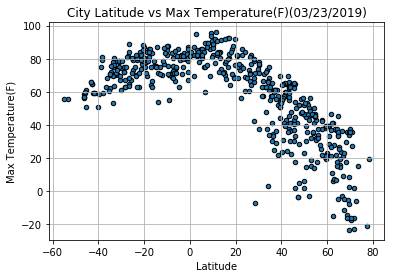

In [40]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Max Temperature(F)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Max Temperature(F)({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_maxtemp.png")
#show plot
plt.show()

#### Latitude vs. Humidity Plot

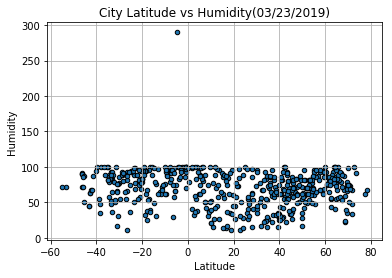

In [41]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Humidity', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Humidity({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_humidity.png")
#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

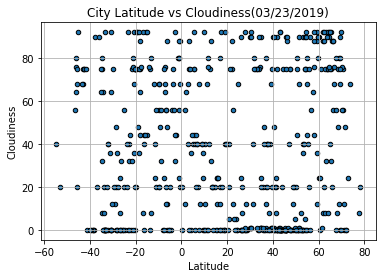

In [42]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Cloudiness', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Cloudiness({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_cloudiness.png")
#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

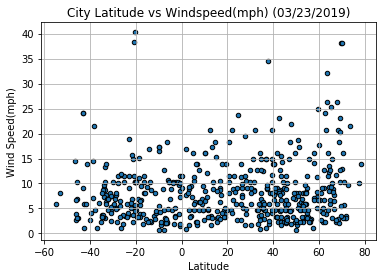

In [43]:
#create scatter plot Latitude vs.Temperature using pandas plot

weather_df.plot.scatter(x="Latitude", y='Wind Speed(mph)', grid=True, 
                               alpha=1, edgecolors ='black', title = f"City Latitude vs Windspeed(mph) ({date_format})")
#test plot
plt.plot()
#savefit
plt.savefig("../Images/lat_windspeed.png")
#show plot
plt.show()